# Data Story

### Results captured from Stathead Football
### https://stathead.com/football/
### https://stathead.com/football/nfl-combine-results.cgi


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# %matplotlib inline
import plotly.express as px

Error: Session cannot generate requests

In [2]:

# Splits Height and converts to inches
def calc_height_in(val):
    raw = val.split('/')
    h_ft = int(raw[0])
    h_in = int(raw[1])
    return float((h_ft * 12) + h_in)

# Get Team Function
def get_Team(draft_str):
    return draft_str.split('/')[0].strip()

# Get Round Function
def get_Round(draft_str):
    return draft_str.split('/')[1].strip()

# Get Round Function
def get_PickNum(draft_str):
    return draft_str.split('/')[2].strip()

# Get Round Function
def get_YearDraft(draft_str):
    return draft_str.split('/')[3].strip()

# Build Offense or Defense
def OffenseDefense(pos_str):
    oPos = ['QB','OG','T','C','TE','OL','WR','RB','FB','P','K','LS']
    if pos_str in oPos:
        return 'O'
    else:
        return 'D'

# Write Common Skill position string
def skill(pos_str):
    oback = ['RB','FB','HB','TB']
    rcvr = ['TE','WR']
    spec = ['K','P','LS']
    oline = ['OG','T','C','OT','OL']
    dline = ['DL','DE','EDGE','DT','NT']
    db = ['DB','FS','SS','S','NICK','CB']
    lb = ['EDGE','ILB','OLB','LB']
        
    if pos_str in rcvr:
        return 'Receiver'
    elif pos_str in spec:
        return 'Specialist'
    elif pos_str in oline:
        return 'OLine'
    elif pos_str in dline:
        return 'DLine'
    elif pos_str in db:
        return 'DBack'
    elif pos_str in lb:
        return 'Linebacker'
    elif pos_str in oback:
        return 'OBack'
    elif pos_str == 'QB':
        return 'QB'
    else:
        return 'NA'
        
# Make target dataframe
df_raw = pd.DataFrame()

# Iterate over know study years
for year in range(2001,2022):
    df = pd.read_csv('.//data//sportsref_download_' + str(year) + '.xls.csv',
                                  dtype={'Height':str,
                                         'Drafted (tm/rnd/yr)':str},
                         parse_dates=False)

    # Dropped unnamed COlumn
    df.drop(columns='Unnamed: 7',inplace=True,axis=1)
    
    # Make First and Last Name Columns
    df[['FirstName', 'LastName']] = df['Player'].str.split(' ', 1, expand=True)
    
    # Map to the 
    df['Height-in'] = df['Height'].map(calc_height_in)
    df.drop(columns=['Height'],axis=1,inplace=True)
    
    # Split Drafted
    df['Drafted (tm/rnd/yr)'].fillna('-/-/-/-',inplace=True) # Inserts dummy string so splitter works
    # Bet Team 
    df['DraftTeam'] = df['Drafted (tm/rnd/yr)'].map(get_Team)
    df['Round'] = df['Drafted (tm/rnd/yr)'].map(get_Round).str.extract('(\d+)') # Get Round
    df['Pick'] = df['Drafted (tm/rnd/yr)'].map(get_PickNum).str.extract('(\d+)') # Get Pick
    df['YearDraft'] = df['Drafted (tm/rnd/yr)'].map(get_YearDraft).str.extract('(\d+)') # Get Year
    df['OD'] = df['Pos'].map(OffenseDefense) # Get Year
    df['Skill'] = df['Pos'].map(skill) # Get Year
    
    
    # Adjust Team Names to avoid duplicates / Team Moves
    df['DraftTeam'] = df['DraftTeam'].str.replace('Washington Redskins','Washington Football Team')
    df['DraftTeam'] = df['DraftTeam'].str.replace('San Diego Chargers','SD/LA Chargers')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Los Angeles Chargers','SD/LA Chargers')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Oakland Raiders','LV/Oak Raiders')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Las Vegas Raiders','LV/Oak Raiders')
    df['DraftTeam'] = df['DraftTeam'].str.replace('St. Louis Rams','LA/STL Rams')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Los Angeles Rams','LA/STL Rams')
    df['DraftTeam'] = df['DraftTeam'].str.replace('Las Vegas Raiders','LV/Oak Raiders')


    df.drop(columns='Drafted (tm/rnd/yr)',inplace=True)
    
    df_raw = pd.concat([df_raw,df],ignore_index=True)
    
    df_raw.to_csv('Cleaned_results.csv')


del df

C:\Users\Mike\AppData\Local\Temp/ipykernel_9764/2635354450.py:98: FutureWarning: The default value of regex will change from True to False in a future version.
  df['DraftTeam'] = df['DraftTeam'].str.replace('St. Louis Rams','LA/STL Rams')


# Feature Engineering

## Create scaled performance Metrics

In [3]:
# Normalize Performance Columns
from sklearn.preprocessing import MinMaxScaler
df_sample = df_raw[df_raw['Skill'] == 'Lineman'][['Player',
                                                  'Pos',
                                                  'Age',
                                                  'School',
                                                  'Wt',
                                                  'Height-in',
                                                  '40YD',
                                                  'Vertical',
                                                  'BenchReps',
                                                  'Broad Jump',
                                                  '3Cone',
                                                  'Shuttle']]

pos = ['Receiver','Specialist','Lineman','Defensive Back','Linebacker','QB','NA']

# Scale these features
scaler = MinMaxScaler()
df_raw['Age_s'] = scaler.fit_transform(df_raw[['Age']])
df_raw['Wt_s'] = scaler.fit_transform(df_raw[['Wt']])
df_raw['Height-in_s'] = scaler.fit_transform(df_raw[['Height-in']])
df_raw['40YD_s'] = scaler.fit_transform(df_raw[['40YD']])
df_raw['Vertical_s'] = scaler.fit_transform(df_raw[['Vertical']])
df_raw['BenchReps_s'] = scaler.fit_transform(df_raw[['BenchReps']])
df_raw['BenchReps_s'] = scaler.fit_transform(df_raw[['BenchReps']])
df_raw['Broad Jump_s'] = scaler.fit_transform(df_raw[['Broad Jump']])
df_raw['3Cone_s'] = scaler.fit_transform(df_raw[['3Cone']])
df_raw['Shuttle_s'] = scaler.fit_transform(df_raw[['Shuttle']])
df_raw['r'] = scaler.fit_transform(df_raw[['Shuttle']])


In [4]:
df_raw.head()

,Rk,Year,Player,Pos,Age,AV,School,Wt,40YD,Vertical,...,Age_s,Wt_s,Height-in_s,40YD_s,Vertical_s,BenchReps_s,Broad Jump_s,3Cone_s,Shuttle_s,r
0,1,2001,Paul Zukauskas,OG,21.0,9.0,Boston Col.,307,5.30,NaN,...,0.313725,0.690909,0.705882,0.610169,NaN,0.425532,NaN,NaN,NaN,NaN
1,2,2001,Ellis Wyms,DE,21.0,15.0,Mississippi State,285,4.97,28.0,...,0.313725,0.590909,0.588235,0.423729,0.327273,NaN,0.3125,0.525735,0.448485,0.448485
2,3,2001,Shawn Worthen,DT,25.0,0.0,TCU,310,5.18,30.0,...,0.392157,0.704545,0.470588,0.542373,0.400000,0.446809,0.3125,0.448529,0.533333,0.533333
3,4,2001,Brandon Winey,OT,23.0,3.0,LSU,301,5.30,NaN,...,0.352941,0.663636,0.764706,0.610169,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2001,Jamie Winborn,ILB,21.0,21.0,Vanderbilt,229,4.63,35.5,...,0.313725,0.336364,0.352941,0.231638,0.600000,NaN,0.4375,NaN,NaN,NaN


# Visualizations and Aggregations

## See Quantities by Skill

In [13]:
df_draft = df_raw.groupby('Skill').size().sort_values(ascending=False)

In [ ]:
sns.barplot(data=df_draft)

Error: Session cannot generate requests

In [ ]:
# More receivers were drafted than any other position

In [6]:
pt = df_raw[['School','Skill','Pos']].pivot_table( \
                index=['School'],
                columns='Skill',
                values='Pos',
                       # margins='True',
                aggfunc=len,
                margins=True,
                sort='True').sort_values(by='All',ascending=False)

pt_filt = pt[(pt['All'] > 50) & (pt['All'] < 200)]
pt_filt.drop(labels=['All'],axis=1,inplace=True)

C:\Users\Mike\.conda\envs\Data\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## What are the top 25 schools in terms of total draft picks and what is the breakdown of player skill types?

In [7]:
fig = px.bar(pt_filt,title='Top Schools and Draft Choices, 2001-2021')
fig.show()

### Miami and Ohio State have the largest amount of Receivers drafted in the last 20 years! (23 each or at least 1 per year)

## What is the breakdown of skill types drafted for each year?

In [8]:
# New DataFrame by Year
pt2 = df_raw[['Year','Skill','Pos']].pivot_table( \
                index=['Year'],
                columns='Skill',
                values='Pos',
                       # margins='True',
                aggfunc=len,
                margins=True,
                sort='True').sort_values(by='All',ascending=False)

pt_filt_2 = pt2[(pt2['All'] > 50) & (pt2['All'] < 201)]
pt_filt_2.drop(labels=['All'],axis=1,inplace=True)

C:\Users\Mike\.conda\envs\Data\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
# Barplot of years
years = [str(x) for x in range(2000,2022)]
fig = px.bar(pt_filt_2,
            labels=dict(x=years),
            title='Skills Drafted Per Year, 2001-2021')
fig.update_xaxes(nticks=20,dtick=1)
fig.show()

### 2020 was a big year for receivers, with 50 receivers drafted!

In [ ]:
# getting necessary libraries
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# getting the data

# as we expect to plot histograms-like plots for each year, we group by year and mean temperature and aggregate with 'count' function
temp = temp.groupby(['year', 'Mean_TemperatureC']).agg({'Mean_TemperatureC': 'count'}).rename(columns={'Mean_TemperatureC': 'count'}).reset_index()

In [10]:
df_raw.groupby(['School']).size().sort_values(ascending=False)

School
Ohio State          106
Alabama             105
USC                 103
LSU                 101
Florida              99
                   ... 
Shepherd              1
Fresno St.            1
San Jose St.          1
Morgan State          1
Middle Tenn. St.      1
Length: 269, dtype: int64

In [11]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'r' is of type str or int.

In [ ]:
df

,r,theta
0,1,processing cost
1,5,mechanical properties
2,2,chemical stability
3,2,thermal stability
4,3,device integration


In [ ]:
df_raw[df_raw['Skill'] == 'QB'].groupby(by=['Year','Skill'])['40YD','Wt','Height-in'].mean()

C:\Users\Mike\AppData\Local\Temp/ipykernel_22792/1882093618.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,40YD,Wt,Height-in
Year,Skill,,,
2001,QB,4.810833,221.583333,74.333333
2002,QB,4.819000,223.300000,74.500000
2003,QB,4.841250,224.750000,74.875000
2004,QB,4.914000,232.733333,75.400000
2005,QB,4.823333,225.777778,75.666667
2006,QB,4.647778,218.666667,75.000000
2007,QB,4.814545,228.818182,75.454545
2008,QB,4.751250,223.375000,75.875000
2009,QB,4.829000,221.900000,74.500000


In [ ]:
df_raw[df_raw['Skill'] == 'Defensive Back'].sort_values(by=['40YD'])

,Rk,Year,Player,Pos,Age,AV,School,Wt,40YD,Vertical,...,Shuttle,FirstName,LastName,Height-in,DraftTeam,Round,Pick,YearDraft,OD,Skill
3604,5,2019,Zedrick Woods,S,NaN,NaN,Mississippi,205,4.29,34.5,...,4.15,Zedrick,Woods,71.0,-,NaN,NaN,NaN,D,Defensive Back
4052,53,2021,Eric Stokes,DB,22.0,NaN,Georgia,194,4.31,38.5,...,4.36,Eric,Stokes,73.0,Green Bay Packers,1,29,2021,D,Defensive Back
1928,129,2010,Taylor Mays,S,22.0,10.0,USC,230,4.31,41.0,...,NaN,Taylor,Mays,75.0,San Francisco 49ers,2,49,2010,D,Defensive Back
1158,159,2006,Michael Huff,S,23.0,38.0,Texas,204,4.34,40.5,...,NaN,Michael,Huff,73.0,LV/Oak Raiders,1,7,2006,D,Defensive Back
4143,144,2021,Kelvin Joseph,DB,20.0,NaN,Kentucky,197,4.34,35.0,...,4.22,Kelvin,Joseph,71.0,Dallas Cowboys,2,44,2021,D,Defensive Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,41,2019,Marvell Tell,S,22.0,1.0,USC,198,NaN,42.0,...,4.01,Marvell,Tell,74.0,Indianapolis Colts,5,144,2019,D,Defensive Back
3685,86,2019,Taylor Rapp,S,21.0,9.0,Washington,208,NaN,35.0,...,3.99,Taylor,Rapp,73.0,LA/STL Rams,2,61,2019,D,Defensive Back
3963,164,2020,Brandon Jones,S,21.0,2.0,Texas,198,NaN,NaN,...,NaN,Brandon,Jones,71.0,Miami Dolphins,3,70,2020,D,Defensive Back
4113,114,2021,Hamsah Nasirildeen,DB,22.0,NaN,Florida St.,215,NaN,32.0,...,4.31,Hamsah,Nasirildeen,75.0,New York Jets,6,186,2021,D,Defensive Back


In [ ]:
df_raw[df_raw['Skill'] == 'D'].groupby(by=['Year'])['40YD','Wt','Height-in'].mean()

<ipython-input-7-6ed93455fcb4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_raw[df_raw['Skill'] == 'D'].groupby(by=['Year'])['40YD','Wt','Height-in'].mean()


,40YD,Wt,Height-in
Year,,,


In [ ]:
df_raw.groupby(by=['DraftTeam','Year','OD','Skill'])['DraftTeam'].count()

DraftTeam                 Year  OD  Skill         
-                         2001  D   Defensive Back    2
                                    Lineman           5
                                    NA                3
                                O   Lineman           4
                                    QB                4
                                                     ..
Washington Football Team  2020  D   Lineman           2
                                    NA                1
                                O   Lineman           1
                          2021  D   Defensive Back    2
                                    Lineman           1
Name: DraftTeam, Length: 2456, dtype: int64

In [ ]:
df_raw[df_raw['DraftTeam'] == 'Dallas Cowboys']

,Rk,Year,Player,Pos,Age,AV,School,Wt,40YD,Vertical,...,Drafted (tm/rnd/yr),FirstName,LastName,Height-in,DraftTeam,Round,Pick,YearDraft,OD,Skill
38,39,2001,Daleroy Stewart,DT,22.0,3.0,Southern Miss,309,4.90,33.0,...,Dallas Cowboys / 6th / 171st pick / 2001,Daleroy,Stewart,75.0,Dallas Cowboys,6,171,2001,D,Lineman
40,41,2001,Markus Steele,OLB,21.0,8.0,USC,232,4.62,33.0,...,Dallas Cowboys / 4th / 122nd pick / 2001,Markus,Steele,75.0,Dallas Cowboys,4,122,2001,D,Linebacker
119,120,2001,Matt Lehr,OG,21.0,25.0,Virginia Tech,290,5.28,31.5,...,Dallas Cowboys / 5th / 137th pick / 2001,Matt,Lehr,74.0,Dallas Cowboys,5,137,2001,O,Lineman
183,184,2001,Char-Ron Dorsey,OT,23.0,1.0,Florida State,348,5.99,NaN,...,Dallas Cowboys / 7th / 242nd pick / 2001,Char-Ron,Dorsey,78.0,Dallas Cowboys,7,242,2001,D,Lineman
185,186,2001,Tony Dixon,S,21.0,9.0,Alabama,213,4.63,37.0,...,Dallas Cowboys / 2nd / 56th pick / 2001,Tony,Dixon,73.0,Dallas Cowboys,2,56,2001,D,Defensive Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,153,2020,CeeDee Lamb,WR,20.0,8.0,Oklahoma,198,4.50,34.5,...,Dallas Cowboys / 1st / 17th pick / 2020,CeeDee,Lamb,74.0,Dallas Cowboys,1,17,2020,O,Receiver
4002,3,2021,Nahshon Wright,DB,22.0,NaN,Oregon St.,183,4.46,31.0,...,Dallas Cowboys / 3rd / 99th pick / 2021,Nahshon,Wright,76.0,Dallas Cowboys,3,99,2021,D,Defensive Back
4096,97,2021,Micah Parsons,LB,21.0,NaN,Penn St.,246,4.39,34.0,...,Dallas Cowboys / 1st / 12th pick / 2021,Micah,Parsons,75.0,Dallas Cowboys,1,12,2021,D,QB
4143,144,2021,Kelvin Joseph,DB,20.0,NaN,Kentucky,197,4.34,35.0,...,Dallas Cowboys / 2nd / 44th pick / 2021,Kelvin,Joseph,71.0,Dallas Cowboys,2,44,2021,D,Defensive Back


In [ ]:
# Aggregations

df_raw.groupby('Pos').count()

,Rk,Year,Player,Age,AV,School,Wt,40YD,Vertical,BenchReps,...,3Cone,Shuttle,Drafted (tm/rnd/yr),FirstName,LastName,Height-in,DraftTeam,Round,Pick,YearDraft
Pos,,,,,,,,,,,,,,,,,,,,,
C,102,102,102,99,94,102,102,96,75,83,...,74,74,102,102,102,102,102,83,83,83
CB,436,436,436,423,390,436,436,426,362,348,...,277,287,436,436,436,436,436,359,359,359
DB,29,29,29,28,2,29,29,26,28,26,...,23,24,29,29,29,29,29,23,23,23
DE,304,304,304,287,260,304,304,298,243,241,...,208,212,304,304,304,304,304,252,252,252
DL,66,66,66,64,41,66,66,54,53,51,...,40,39,66,66,66,66,66,52,52,52
DT,302,302,302,293,269,302,302,295,230,233,...,198,203,302,302,302,302,302,250,250,250
EDGE,26,26,26,25,23,26,26,21,22,18,...,15,17,26,26,26,26,26,22,22,22
FB,71,71,71,69,62,71,71,71,60,59,...,52,52,71,71,71,71,71,46,46,46
ILB,171,171,171,166,157,171,171,168,136,134,...,102,109,171,171,171,171,171,130,130,130


In [ ]:
# Joyplot of some feature over 20 years of draft by position

In [ ]:
# Animation of Bubbles of progression of features by year

In [ ]:
# Distribution of Position

array([[<AxesSubplot:title={'center':'Wt'}>]], dtype=object)

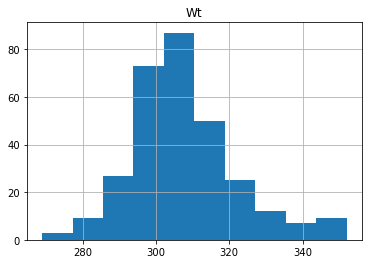

In [ ]:
df_raw[df_raw['Pos'] == 'DT'].hist('Wt')

In [ ]:
# Change in size of interior linemen

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df_subset_DT = df_raw[df_raw['Pos'] == 'DT']
# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
m = df_raw.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:
# Hans Roesling Bubble Chart

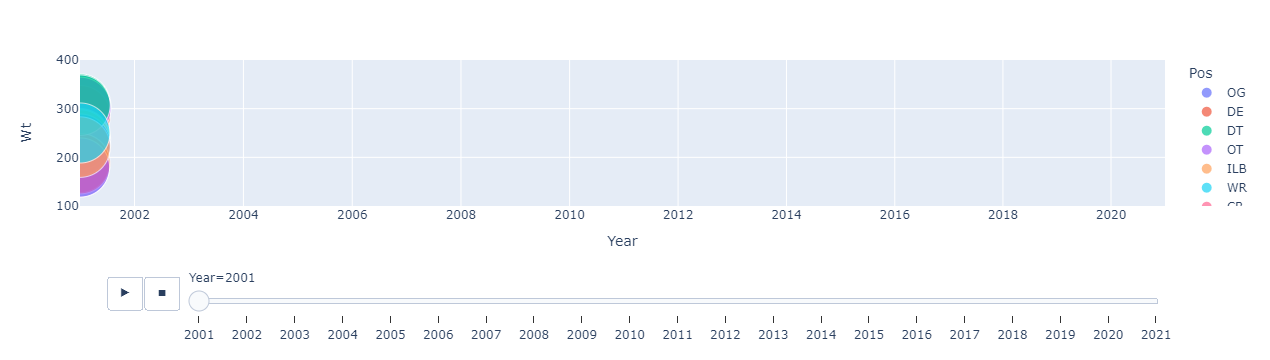

In [ ]:

fig = px.scatter(df_raw,x='Year', y='Wt',animation_frame='Year', 
     animation_group='Pos',size='Height-in', 
     color='Pos',
     hover_name='Pos', log_x=True, 
     size_max=45,range_x=[2001,2021], range_y=[100,400]
 )
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 700
fig.show()

# Distribution of player Weights

# What are the Position Strengths for Each College - breakdown colleges by positions

# What changes have we seen for certain player features over last 20 years?
- Are players getting faster, or is this noise
- Are players getting bigger, or is this noise

# How can we rank players by their combine numbers?  Spider Graph?

# Do Certain Teams Favor Certain Colleges?

In [ ]:
## Line chart of means of attributes over the years

In [ ]:
# Average Age of Players drafted over the last 20 years

In [ ]:
# Spider Charts

In [ ]:
# Aggregated statistics per year per skill group